# 04 Add a Base Map To A Static Plot
---

Using the [`contextily`](https://github.com/geopandas/contextily) package to add an OS Maps API base map to a plot of a GeoDataFrame.

### contextily
---

The [contextily](https://contextily.readthedocs.io/en/latest/) Python package allows pre-rendered web mapping tiles to be easily added to a GeoPandas GeoDataFrame plot as a base map.

### OS Data Hub
---

The OS Data Hub is the new data portal to access Ordnance Survey (OS) data. Data can be downloaded through a user interace or programatically via a series of APIs enabling direct integration with software applications.

The OS Data Hub [Public Sector Plan](https://www.ordnancesurvey.co.uk/business-government/public-sector-geospatial-agreement/data-hub-for-public-sector) provides [PSGA members](https://www.ordnancesurvey.co.uk/business-government/sectors/public-sector) with unlimited access to OS OpenData and OS Premium data available under the PSGA via API or download.

In [1]:
%pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 55.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from datetime import datetime

Matplotlib created a temporary cache directory at /tmp/matplotlib-oow890fe because the default path (/home/rstudio-user/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


###  Create GeoDataFrame from GeoPackage (GPKG)

In [2]:
# Create a GeoPandas GeoDataFrame from a GeoPackage (GPKG)
osogs = gpd.read_file(
    filename="../../data/ordnance-survey/os-open-greenspace-gb.gpkg",
    # GPKG layer
    layer="greenspace_site",
)

ERROR 1: PROJ: proj_create_from_database: Open of /cloud/lib/envs/training/share/proj failed


###  Spatially subset GeoDataFrame

Using coordinate-based indexer to spatially subset by bounding box (BBOX).

In [3]:
# Coordinate-based indexer to select by intersection with BBOX
# Greater London BBOX
# xmin:xmax, ymin:ymax
osogs_filtered = osogs.cx[
    503568.1996:561957.4962, 155850.7975:200933.9026
]

In [4]:
# Row count
osogs_filtered.shape[0]

12531

### Plot GeoDataFrame

<Axes: title={'center': 'Spatial Distribution of OS Open Greenspace in Greater London Authority'}>

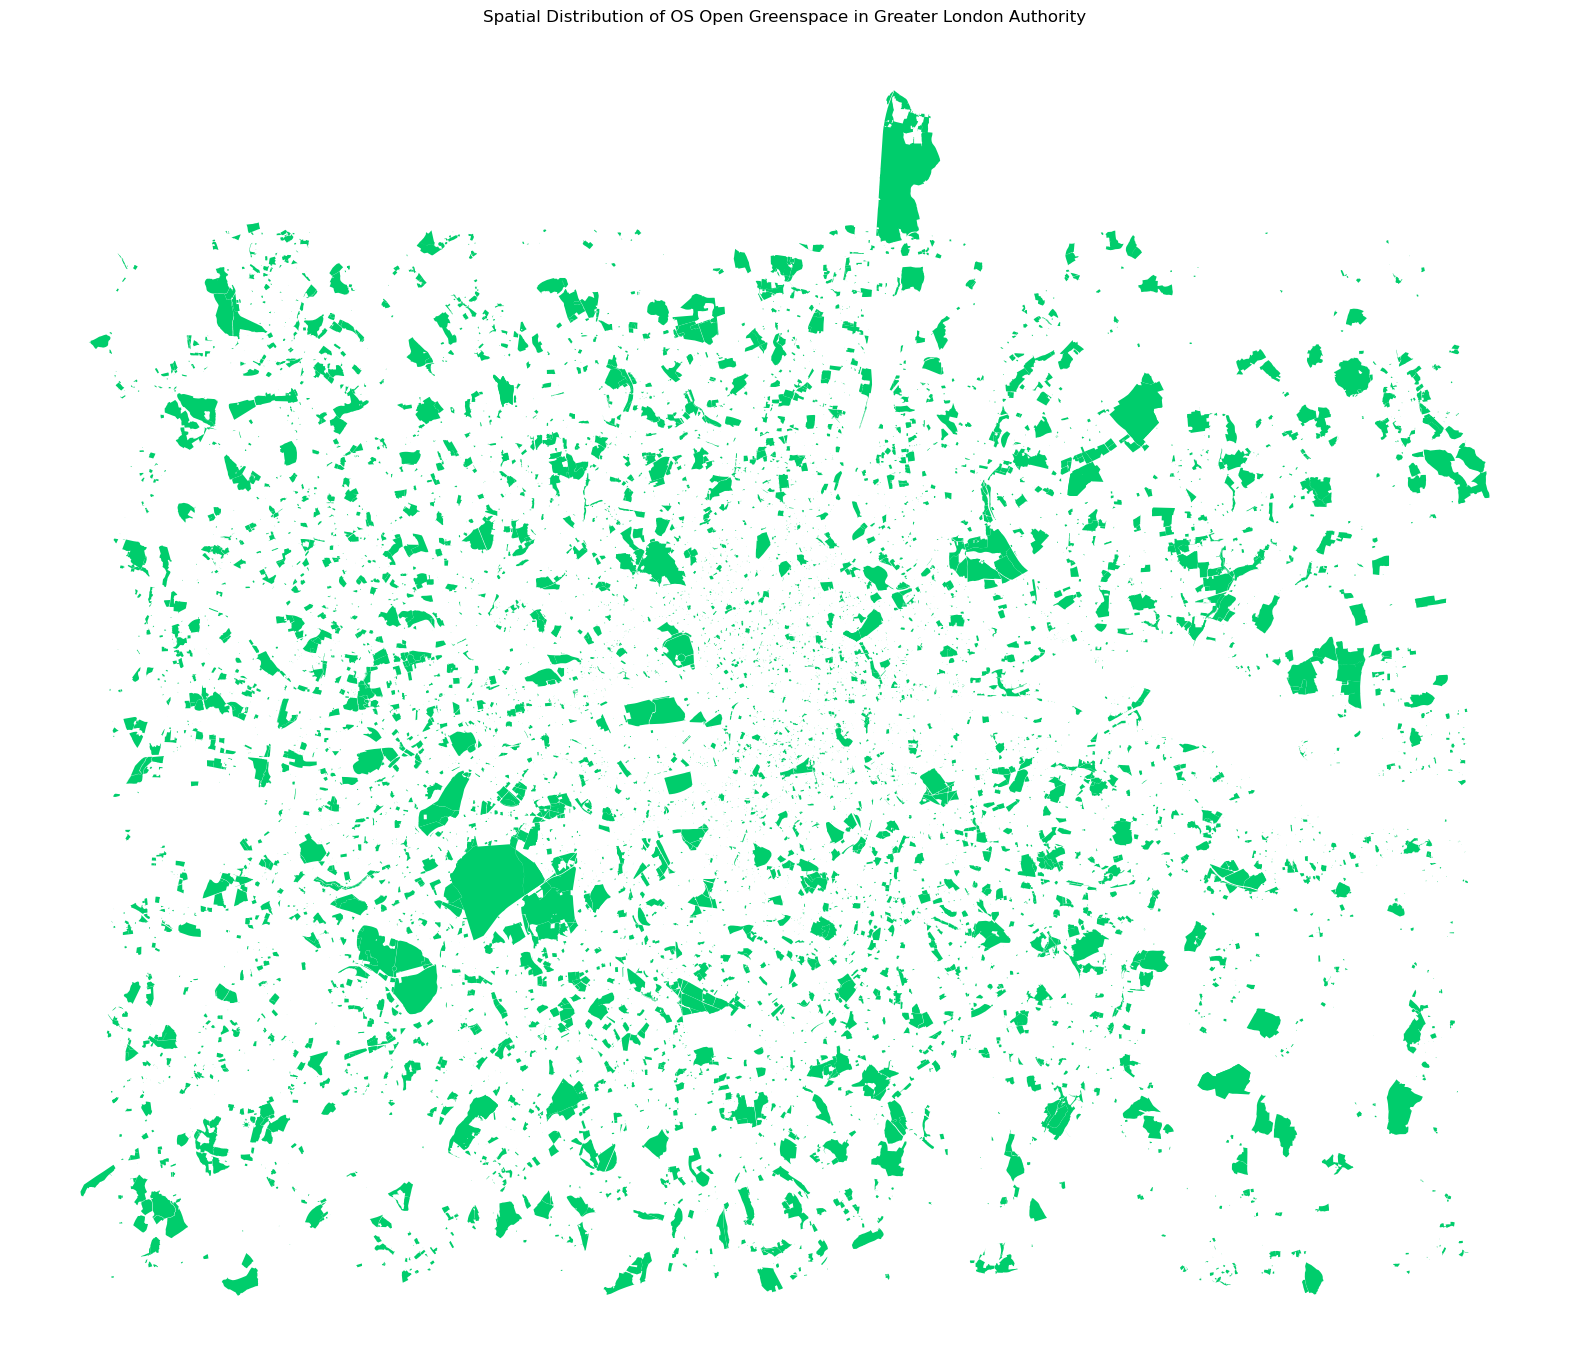

In [5]:
# Create figure and axes objects
f, ax = plt.subplots(figsize=(20, 20))

# Set title
ax.set_title("Spatial Distribution of OS Open Greenspace in Greater London Authority")
# Turn axis off
ax.set_axis_off()

# Plot GeoDataFrame
osogs_filtered.plot(ax=ax, color="#00cd6c")

### Add OS Maps API base map to GeoDataFrame plot

In [6]:
# OS Maps API layer name
# Example uses Light Style in Web Mercator (EPSG:3857) projection
layer = "Light_3857"
# OS Data Hub project API key
key = "frKhvBUiMB5DGwl3pGb2GzcOz6ApgyP0"

# OS Data Hub base path - https://api.os.uk
# OS Maps API ZXY end point path - /maps/raster/v1/zxy/
url = f"https://api.os.uk/maps/raster/v1/zxy/{layer}/{{z}}/{{x}}/{{y}}.png?key={key}"

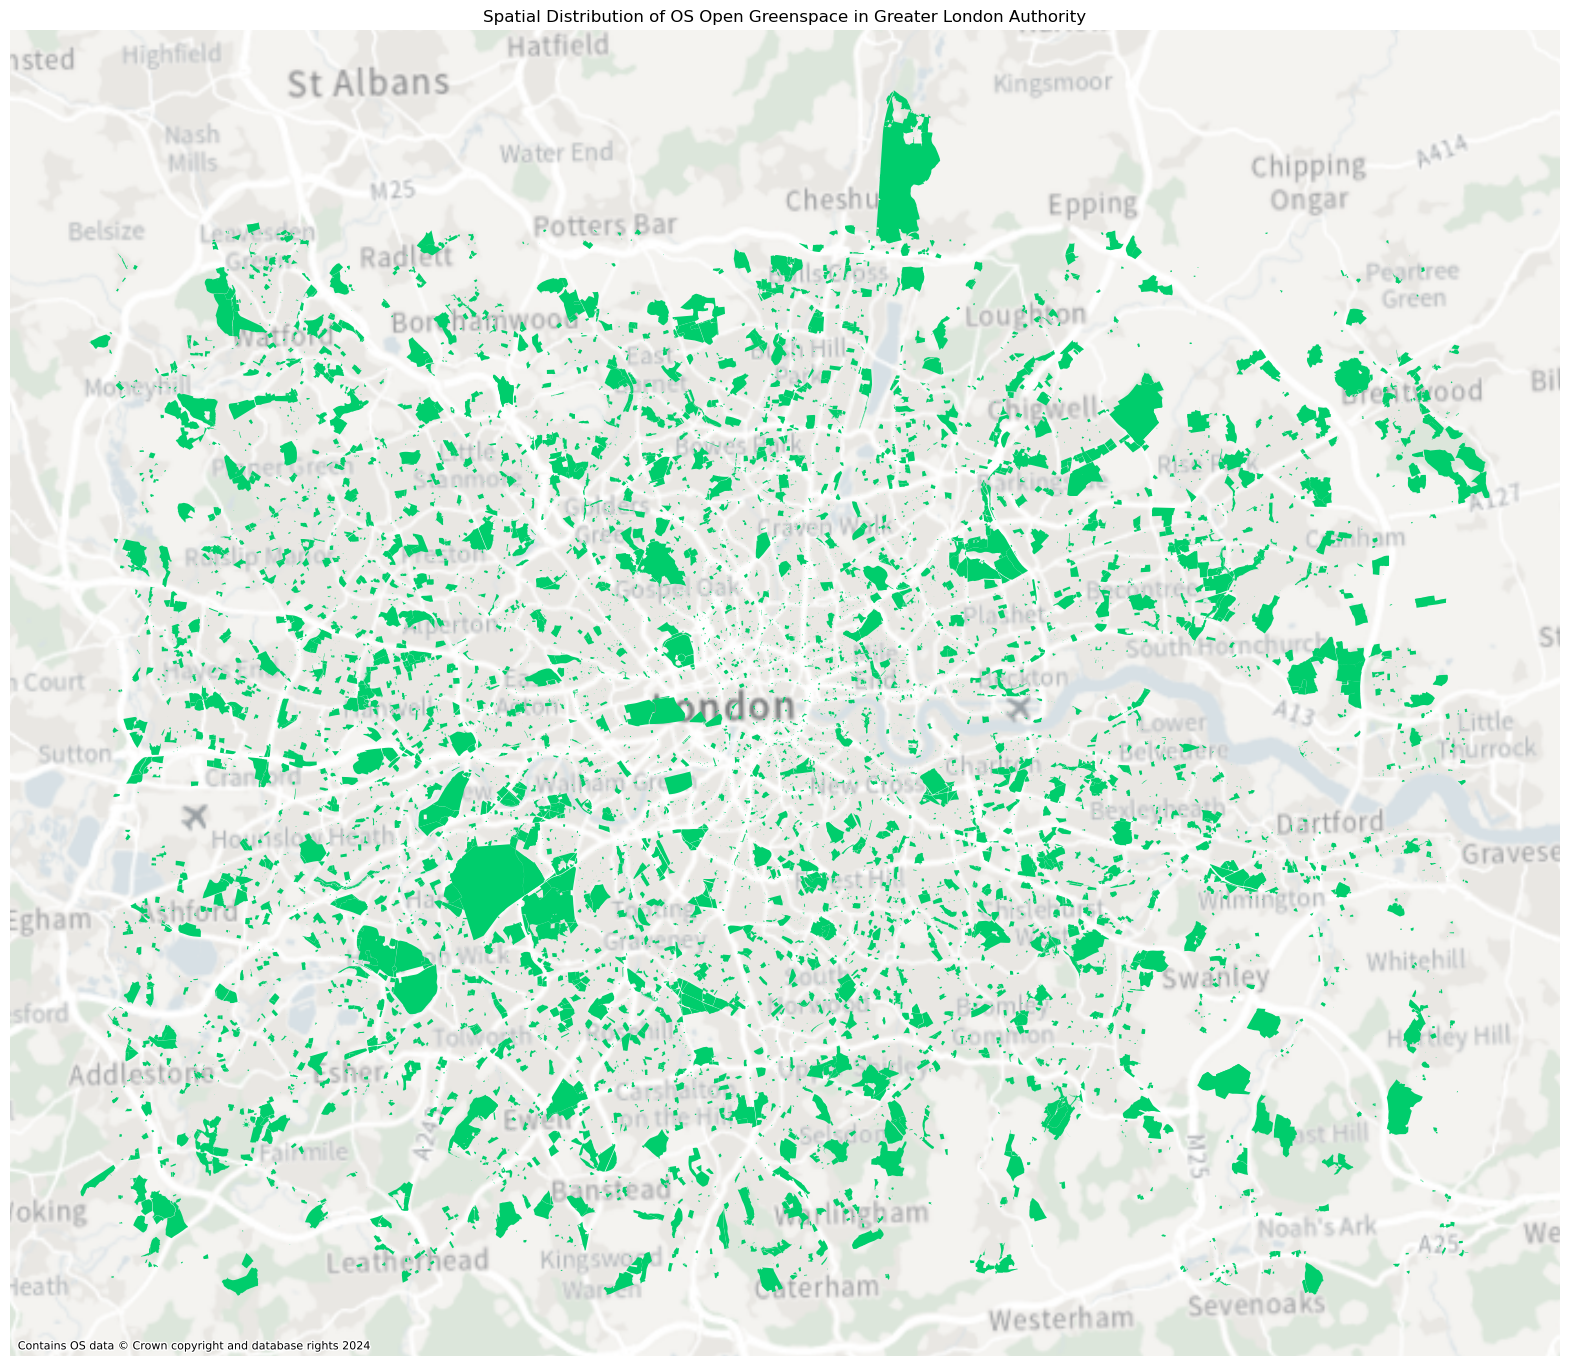

In [7]:
# Create figure and axes objects
f, ax = plt.subplots(figsize=(20, 20))

# Set title
ax.set_title("Spatial Distribution of OS Open Greenspace in Greater London Authority")
# Turn axis off
ax.set_axis_off()

# Plot GeoDataFrame
osogs_filtered.plot(ax=ax, color="#00cd6c")

# Add base map
cx.add_basemap(
    ax,  # Matplotlib axes object
    source=url,  # OS Maps API
    attribution=f"Contains OS data © Crown copyright and database rights {datetime.now().year}",  # Aattribution statement
    crs=osogs.crs,
)  # Base map CRS